In [1]:
import tensorflow as tf

F:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
import keras as k

F:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [4]:
import numpy as np
import keras.utils as u

F:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
path='F:\dataset\mnist.npz'

In [8]:
f = np.load(path)

In [9]:
f = np.load(path)
(X_train,y_train),(X_test,y_test)=(f['x_train'],f['y_train']),(f['x_test'],f['y_test'])

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
X_test=f['x_test']

In [12]:
from keras.layers import Input,Conv2D,MaxPool2D,Flatten,Dense

In [13]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)

In [14]:
X_train=X_train/255.

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [17]:
X_test=X_test/255.

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
y_train=u.to_categorical(y_train,10)

In [20]:
y_train.shape

(60000, 10)

In [21]:
 y_test=u.to_categorical(y_test,10)

In [22]:
x=Input(shape=(28,28,1))

In [23]:
input_tensor=x

In [24]:
x

<tf.Tensor 'input_1:0' shape=(?, 28, 28, 1) dtype=float32>

In [25]:
x=Conv2D(128,kernel_size=(3,3),padding='same',activation='relu')(input_tensor)
x=Conv2D(128,kernel_size=(3,3),padding='same',activation='relu')(x)
x=MaxPool2D(2)(x)

x=x=Conv2D(256,kernel_size=(3,3),padding='same',activation='relu')(x)
x=Conv2D(256,kernel_size=(3,3),padding='same',activation='relu')(x)
x=MaxPool2D(2)(x)

x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dense(84,activation='relu')(x)
x=Dense(10,activation='softmax')(x)

In [26]:
from keras import Model
from keras.preprocessing.image import ImageDataGenerator

In [27]:
model = Model(inputs=input_tensor,outputs=x)

In [28]:
gen = ImageDataGenerator()

In [29]:
from keras.optimizers import  RMSprop

In [30]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [31]:
model.fit_generator(gen.flow(X_train,y_train,batch_size=128,shuffle=True),validation_data=(X_test,y_test),epochs=20,verbose=1)

Epoch 1/20
469/469 [==============================] - 53s 113ms/step - loss: 0.1951 - acc: 0.9385 - val_loss: 0.0308 - val_acc: 0.9904
Epoch 2/20
469/469 [==============================] - 30s 63ms/step - loss: 0.0380 - acc: 0.9887 - val_loss: 0.0284 - val_acc: 0.9901380  - ETA: 0s - loss: 0.0380 - 
Epoch 3/20
158/469 [=========>....................] - ETA: 18s - loss: 0.0240 - acc: 0.9923

KeyboardInterrupt: 

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 256)       590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 256)         0         
__________

In [82]:
img1 = X_test.reshape(10000,28,28,1)
img1 = img1[0]
img1=img1.reshape(1,28,28,1)

In [83]:
result=model.predict(img1)

In [59]:
result

array([[2.2345100e-26, 2.3446013e-23, 1.0000000e+00, ..., 8.0758328e-20,
        2.8059605e-15, 5.7677334e-34],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0846814e-36, 3.9458079e-38, 1.0000000e+00, ..., 1.7883969e-34,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
np.argmax(result)

7

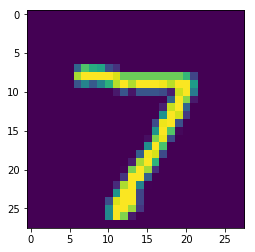

In [85]:
plt.imshow(X_test[0])

In [88]:
model.save_weights('../mymodel/mnist.h5')

In [6]:
path='F:\dataset\mnist.npz'
f = np.load(path)
(X_train,y_train),(X_test,y_test)=(f['x_train'],f['y_train']),(f['x_test'],f['y_test'])

In [10]:
#pytorch版本
import torch
import torchvision
from torchvision import datasets, transforms
# 1. 加载MNIST手写数字数据集数据和标签
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])
trainset = datasets.MNIST(root='./data', train=True,
                            download=True, transform=transform)
trainsetloader = torch.utils.data.DataLoader(trainset, batch_size=20000, shuffle=True)

testset = datasets.MNIST(root='./data', train=True,
                            download=True, transform=transform)
testsetloader = torch.utils.data.DataLoader(testset, batch_size=20000, shuffle=True)


# 2. 设计网络结构
first_in, first_out, second_out = 28*28,  128, 10
model = torch.nn.Sequential(
    torch.nn.Linear(first_in, first_out),
    torch.nn.ReLU(),
    torch.nn.Linear(first_out, second_out),
)

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(10):
    for i, one_batch in enumerate(trainsetloader,0):
        data,label = one_batch
        data[0].view(1,784)
        data = data.view(data.shape[0],-1)
        model_output = model(data)
        # 5.1 用所设计算损失(误差)函数计算误差
        loss = loss_fn(model_output , label)
        if i%500 == 0:
            print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

torch.save(model,'./my_handwrite_recognize_model.pt')

testdataiter = iter(testsetloader)
testimages, testlabels = testdataiter.next()

img_vector = testimages[0].squeeze().view(1,-1)
result_digit = model(img_vector)
print("该手写数字图片识别结果为：", result_digit.max(1)[1],"标签为：",testlabels[0])

Processing...
Done!
tensor(2.3187, grad_fn=<NllLossBackward>)
tensor(2.2542, grad_fn=<NllLossBackward>)
tensor(2.2025, grad_fn=<NllLossBackward>)
tensor(2.1565, grad_fn=<NllLossBackward>)
tensor(2.1102, grad_fn=<NllLossBackward>)
tensor(2.0664, grad_fn=<NllLossBackward>)
tensor(2.0156, grad_fn=<NllLossBackward>)
tensor(1.9715, grad_fn=<NllLossBackward>)
tensor(1.9213, grad_fn=<NllLossBackward>)
tensor(1.8800, grad_fn=<NllLossBackward>)
该手写数字图片识别结果为： tensor([7]) 标签为： tensor(9)
